# **18CSA392 - Minor Project**








# **Correlation and Association Mining Based Networks using Different Network Centrality Measures and Stock Prediction - Indian Stock Exchange**

**PROJECT GUIDE    :**

> Mrs.Jisha R C



**TEAM MEMBERS    :**

> Achu Pushpan                   -       AM.SC.U3CSC19004


> Ashish Arvind Suryawanshi - AM.SC.U3CSC19021

> Harinandanan N - AM.SC.U3CSC19034

> Hareendran V - AM.AR.U317BCA033

> Midhun Manu - AM.SC.U3CSC19047











**PROJECT SCOPE**

The analysis of stock market can be used to evaluate the changes that occur in the Indian economy. That is, on analyzing different indices in the stock market, we can
1.   Predict the Sector which is correlated to many other Sectors
2.   Predict the most Influenced Sector by other Sector Prices.
3.   Predict the Closing Price by using LSTM.









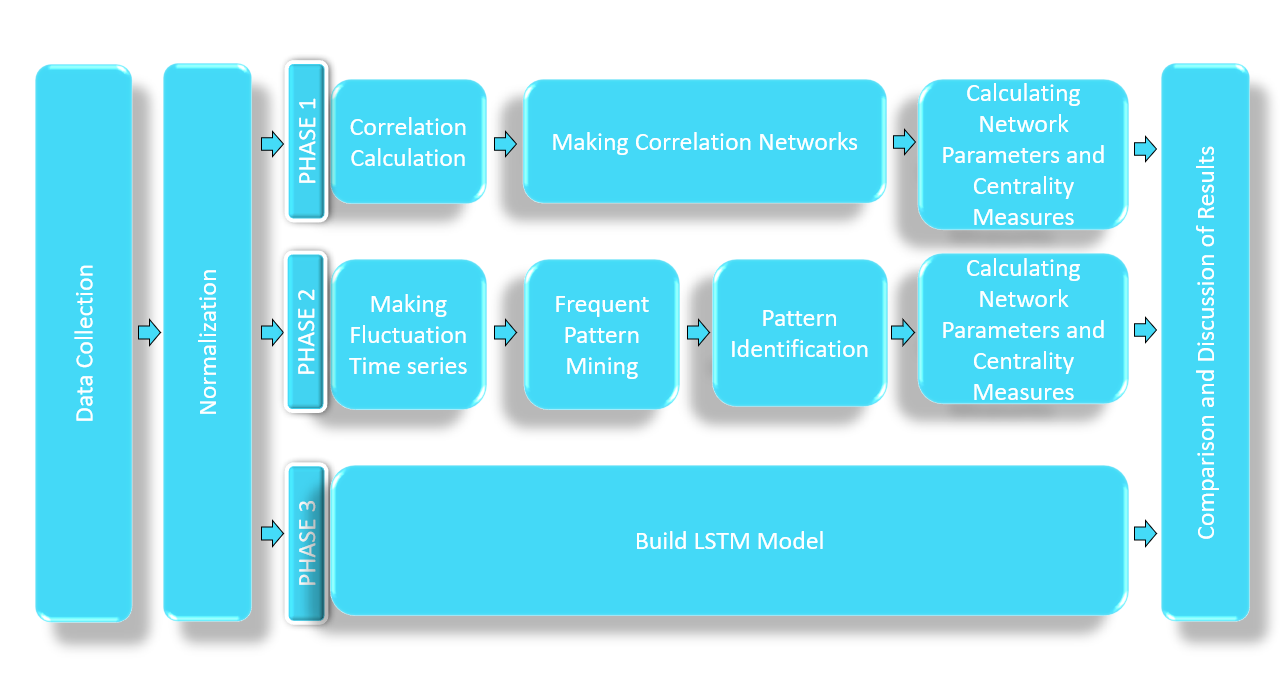

# **Data Collection**

*   Data for market sector price indices are gathered from the official website of NSE India. 
*   Data gathered are for the period of 1st January 2020 to 31st December 2020.
*   Considering the missing data(national holidays), 251 daily stock sector index closing price were gathered for 12 market sector indices.
*   Sectors used for analysis are :     
    1.  **NIFTY AUTO :** This sector includes manufacturers of cars & motorcycles, heavy vehicles, auto ancillaries, tyres, etc.
    2.  **NIFTY BANK :** This sector represents 12 most liquid and large capitalised stocks from the banking sector which trade on the National Stock Exchange (NSE).
    3. **NIFTY FINANCE :** The Nifty Financial Services Index is designed to reflect the behaviour and performance of the Indian financial market which includes banks, financial institutions, housing finance, insurance companies and other financial services companies.
    4. **NIFTY FMCG :** This sector includes goods and products, which are non-durable, mass-consumption products and available off the shelf.
    5. **NIFTY HEALTHCARE :** This sector is designed to reflect the behaviour and performance of the Healthcare companies.
    6. **NIFTY IT :** This sector is designed to reflect the behaviour of companies engaged into activities such as IT infrastructure, IT education and software training, networking infrastructure, software development, hardware, IT support and maintenance etc...
    7. **NIFTY MEDIA :** This sector is designed to reflect the behavior and performance of sectors such as media & entertainment,  printing and publishing. 
    8. **NIFTY METAL :** This sector is designed to reflect the behavior and performanceof the metals sector including mining. 
    9. **NIFTY PHARMA :** This sector is designed to reflect the behavior and performance of the companies that are engaged into manufacturing of pharmaceuticals. 
    10. **NIFTY PRIVATE BANK :** This sector is designed to reflect the behavior and performance of the banks from private sector.
    11. **NIFTY PSU BANK :** The NIFTY PSU Bank Index captures the performance of the PSU Banks. All Public Sector Banks that are traded  at the National Stock Exchange (NSE) are eligible for inclusion in the index subject to fulfilment of
other inclusion criteria namely listing history and trading frequency.
    12. **NIFTY REALTY :** This sector is designed to reflect the behavior and performance of the companies that are engaged into construction of residential & commercial real estate properties



 **DataSet**   :    stock.csv

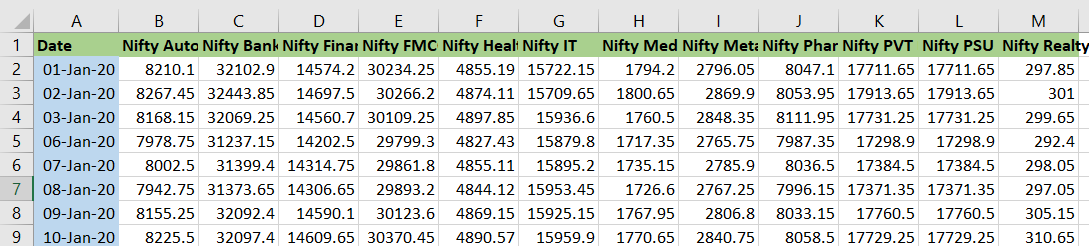

In [ ]:
#importing the libraries
import pandas as pd
#Loading the dataset
stock = pd.read_csv('/home/stock.csv',header=0,index_col='Date',parse_dates=True)
stock.head()

FileNotFoundError: ignored

# **Analyzing Closing Price of Different Sectors**

In [ ]:
stock.plot(figsize=(15,7))

# **Normalizing Data**


*   Normalization is used to scale the data of an attribute so that it falls in a smaller range, such as -1.0 to 1.0 or 0.0 to 1.0. 
*  **Min-Max Normalization –**
In this technique of data normalization, linear transformation is performed on the original data. Minimum and maximum value from data is fetched and each value is replaced according to the following formula.



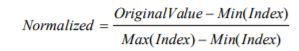

In [ ]:
normalized_stock = stock.copy()
# apply normalization techniques
for column in normalized_stock.columns:
    normalized_stock[column] = (normalized_stock[column] - normalized_stock[column].min()) / (normalized_stock[column].max() - normalized_stock[column].min())    

In [ ]:
#printing the normalized data
normalized_stock

# **PHASE 1 :** Predict the Sector which is correlated to many other Sectors

***CALCULATION OF CORRELATION COEFFICIENT***

It is used to measure how strong a relationship is between two sectors.

**FORMULA :**

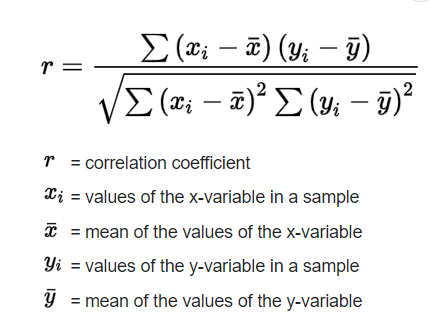

In [ ]:
#Calculating the correlation coefficient
correlations = normalized_stock.corr()
#Printing the correlation coefficient values
correlations

*   **corr()** function is used to calculate the pairwise correlations between columns.
*   This function returns a correlation matrix.
*    **Correlation Coefficient, r** is a digit between -1 and +1.
*    **r>0 :** Positively Correlated
*   **r=0  :** Negatively Correlated
*  **r<0 :** No Correlation

***Plotting Bar Graph to analyze Correlation***

In [ ]:
#Plotting the Bar Graph for Correlation
correlations.plot(kind="bar",figsize=(18, 10))

***Construction of Undirected Correlated Network***

Correlation Matrix is transformed into a data frame called links with 3 columns Sector_1, Sector_2 and r_value.

In [ ]:
# Transform it in a links data frame (3 columns only)
links = correlations.stack().reset_index()
links.columns = ['Sector_1', 'Sector_2', 'r_value']
links

## ***Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)***    
**Threshold Value =>** 0.6

In [ ]:
#Filtering the links dataframe by keeping the correlation over a threshold 0.6 and removing all self corelation.
links1=links.loc[ (links['r_value'] > 0.6) & (links['Sector_1'] != links['Sector_2']) ]
links1

**Threshold Value =>** 0.7

In [ ]:
#Filtering the links dataframe by keeping the correlation over a threshold 0.7 and removing all self corelation.
links2=links.loc[ (links['r_value'] > 0.7) & (links['Sector_1'] != links['Sector_2']) ]
links2

*   Correlation Network is constructed using **networkx** package.
*   **networkX** is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

In [ ]:
# Importing the networkx package
import networkx as nx

**Correlation Network with Threshold Value 0.6**

In [ ]:
# Building the Graph
G1=nx.from_pandas_edgelist(links1, 'Sector_1', 'Sector_2')
# Plot the network
nx.draw(G1, with_labels=True, node_color='blue', node_size=400, edge_color='black', linewidths=1, font_size=15)

**Correlation Network with Threshold Value 0.7**

In [ ]:
# Building the Graph
G2=nx.from_pandas_edgelist(links2, 'Sector_1', 'Sector_2')
# Plot the network
nx.draw(G2, with_labels=True, node_color='blue', node_size=400, edge_color='black', linewidths=1, font_size=15)

***Network Parameter Identification***

In [ ]:
# Counting the number of nodes and edges in graph with threshold = 0.6
count_node1_corr = nx.number_of_nodes(G1)
count_edge1_corr = nx.number_of_edges(G1)

In [ ]:
# Counting the number of nodes and edges in graph with threshold = 0.7
count_node2_corr = nx.number_of_nodes(G2)
count_edge2_corr = nx.number_of_edges(G2)

In [ ]:
# Showing Network Parameters in a data frame
data = [['Threshold = 0.6', count_node1_corr,count_edge1_corr], ['Threshold = 0.7', count_node2_corr,count_edge2_corr]]
df = pd.DataFrame(data, columns = ['Model', 'Number of Nodes','Number of Links'])
df

***Applying Centrality Measures***

*   Centrality Measures allows us to pinpoint the most important nodes of a Network.
*    Some of the centrality measures used are :     
1. **Degree Centrality :**    It calculates all the links that start or end
from a node. If the links coming to a node are counted, it is
called in-degree and if the links going out of the node are
counted, it is called out-degree.
2. **Closeness Centrality :** It measures the mean distance from a node to other nodes. 
3.  **Betweeness Centrality :** It measures the extent to which a node lies on
paths between other couple of nodes.
4.   **Eigenvector Centrality :** . It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

### **Calculating Centrality Measures on Graph with Threshold 0.6**

In [ ]:
# Returns a Dictionary With Key as Sector and Value as the Centrality Values
de1 = nx.degree_centrality(G1)
c1 = nx.closeness_centrality(G1)
b1 = nx.betweenness_centrality(G1)
e1 = nx.eigenvector_centrality(G1)

In [ ]:
# Sorting the Dictionary of e1
s_h = {k: v for k, v in sorted(e1.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k) 
d1 = {'Eigenvector' : aux1}

In [ ]:
# Sorting the Dictionary of de1
s_h = {k: v for k, v in sorted(de1.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
index = [1,2,3,4,5,6,7,8,9,10]  
d2 = {'Degree' : aux1}

In [ ]:
# Sorting the Dictionary of c1
s_h = {k: v for k, v in sorted(c1.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d3 = {'Closeness' : aux1}

In [ ]:
# Sorting the Dictionary of b1
s_h = {k: v for k, v in sorted(b1.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d4 = {'Betweenness' : aux1}

In [ ]:
# Transferring d1,d2,d3,d4 into a single dictionary
data_Dic = dict(list(d1.items())+list(d2.items())+list(d3.items())+list(d4.items()))

In [ ]:
# data_Dic dictionary is transfered to dataframe dframe
dframe = pd.DataFrame(data_Dic,index=index)
dframe

### **Calculating Centrality Measures on Graph with Threshold 0.7**

In [ ]:
# Returns a Dictionary With Key as Sector and Value as the Centrality Values
de2 = nx.degree_centrality(G2)
c2 = nx.closeness_centrality(G2)
b2 = nx.betweenness_centrality(G2)
e2 = nx.eigenvector_centrality(G2)

In [ ]:
# Sorting the Dictionary of e1
s_h = {k: v for k, v in sorted(e2.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k) 
d1 = {'Eigenvector' : aux1}

In [ ]:
# Sorting the Dictionary of de2
s_h = {k: v for k, v in sorted(de2.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
index = [1,2,3,4,5,6,7,8,9,10]  
d2 = {'Degree' : aux1}

In [ ]:
# Sorting the Dictionary of c2
s_h = {k: v for k, v in sorted(c2.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d3 = {'Closeness' : aux1}

In [ ]:
# Sorting the Dictionary of b2
s_h = {k: v for k, v in sorted(b2.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d4 = {'Betweenness' : aux1}

In [ ]:
# Transferring d1,d2,d3,d4 into a single dictionary
data_Dic = dict(list(d1.items())+list(d2.items())+list(d3.items())+list(d4.items()))

In [ ]:
# data_Dic dictionary is transfered to dataframe dframe
dframe = pd.DataFrame(data_Dic,index=index)
dframe

#**RESULT   :** 
In correlation networks, the ***Nifty Auto*** sector shows more correlation with other sector indices. This results that if some could only see one sector to analyze the
fluctuations of the Indian Stock Market(NSE), the Nifty Auto sector index showed a better behavior of
the NSE than other sector indices.

# **PHASE 2 :**  Predict the most Influenced Sector by other Sector Prices.

***Making Fluctuation Time Series***


*   Normalized Dataset is converted into a fluctuating binary dataset with zeroes and ones.
*   A rise in value of the stock index from the previous value in the time series is represented by a **1**, and a **0** indicates a fall in the value.

In [ ]:
# Normalized Data was stored in normalized_stock

# Finding The length of the Normalized Dataset
length=len(normalized_stock)
length

In [ ]:
# Copying the normalized_stock into stock Variable
stock=normalized_stock
stock

In [ ]:
# Code to convert the Dataset into a Fluctuating Binary Dataset :
for j in range(0,12):
   for i in range(0,length-1):
      if stock.values[i+1,j]>stock.values[i,j] :
         stock.values[i,j]=1
      else :
         stock.values[i,j]=0

In [ ]:
# Displaying the Fluctuating Binary Dataset
stock

After the conversion the last row of the new dataset will not be binary and need to be removed.

In [ ]:
# Removing last row
stock = stock.iloc[:-1]
stock

The new dataset will have one 
day less than the original dataset.

***Pattern Identification***




*   Pattern Identification is done by **Association Rule Mining.**
*   The patterns found by Association Rule mining represent relationships between the sectors.
*  **Apriori** is the name of the famous algorithm to find association rules in a dataset.

##### **STEPS FOR APRIORI ALGORITHM :**

**STEP 1 :**Determine the support of itemsets in the transactional database and select the minimum support and confidence.              
**STEP 2 :** Take all supports in the transaction with higher support value than the minimum or selected support value.                          
**STEP 3 :** Find all the rules of these subsets that have higher confidence value than the minimum confidence.

In [ ]:
!pip install apyori
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# building the model
frequent_patterns=apriori(stock,min_support=0.01,max_len=2,use_colnames=True)

In [ ]:
# Building the association rules
rules=association_rules(frequent_patterns,metric="confidence",min_threshold=0.5)
# Changing the antecedents and consequents values from frozenset to list
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [ ]:
# Extracting the column antecedents,consequents and confidence from rules data frame into apriori_rules data frame
apriori_rules = pd.DataFrame([rules.antecedents, rules.consequents, rules.confidence]).transpose()
# Displaying apriori_rules
apriori_rules

*   **Antecedents :** IF component of an association rule is known as the antecedent.
*   **Consequents :**THEN component of an association rule is known as the Consequent.
*   **Confidence :** It measures the certainity or trustworthiness associated with each discovered pattern. It is calculated as the number of transactions that include both Antecedents and Consequents divided by the number of transactions includes only product Antecedents.

***Construction of Directed Apriori Network***

## ***Keep Only Confidence over a Minimum Threshold***


**Threshold : 0.7**

In [ ]:
# Filtering the Confidence greater than the threshold value
apriori_filtered1 =apriori_rules.loc[ (apriori_rules['confidence'] > 0.7)]
apriori_filtered1

**Threshold : 0.8**

In [ ]:
# Filtering the Confidence greater than the threshold value
apriori_filtered2 =apriori_rules.loc[ (apriori_rules['confidence'] > 0.8)]
apriori_filtered2

**Apriori Network with Threshold Value 0.7**

In [ ]:
# Building the Graph
G1=nx.from_pandas_edgelist(apriori_filtered1, 'antecedents', 'consequents', create_using=nx.DiGraph() )
# Plot the Network
nx.draw(G1,with_labels=True, node_color='green', node_size=400, edge_color='black', linewidths=1, font_size=10, arrows=True)

**Apriori Network with Threshold Value 0.8**

In [ ]:
# Building the Graph
G2=nx.from_pandas_edgelist(apriori_filtered2, 'antecedents', 'consequents', create_using=nx.DiGraph() )
# Plot the Network
nx.draw(G2,with_labels=True, node_color='green', node_size=400, edge_color='black', linewidths=1, font_size=10, arrows=True)

***Network Parameter Identification***

In [ ]:
# Counting the number of nodes and edges in graph with threshold = 0.7
count_node1_corr = nx.number_of_nodes(G1)
count_edge1_corr = nx.number_of_edges(G1)

In [ ]:
# Counting the number of nodes and edges in graph with threshold = 0.8
count_node2_corr = nx.number_of_nodes(G2)
count_edge2_corr = nx.number_of_edges(G2)

In [ ]:
# Showing Network Parameters in a data frame
data = [['Threshold = 0.7', count_node1_corr,count_edge1_corr], ['Threshold = 0.8', count_node2_corr,count_edge2_corr]]
df = pd.DataFrame(data, columns = ['Model', 'Number of Nodes','Number of Links'])
df

***Applying Centrality Measures***

*   Centrality Measures allows us to pinpoint the most important nodes of a Network.
*    Some of the centrality measures used are :     
1. **Degree Centrality :**    It calculates all the links that start or end
from a node. If the links coming to a node are counted, it is
called in-degree and if the links going out of the node are
counted, it is called out-degree.
2. **Closeness Centrality :** It measures the mean distance from a node to other nodes. 
3.  **Betweeness Centrality :** It measures the extent to which a node lies on
paths between other couple of nodes.
4.   **Eigenvector Centrality :**  It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

### **Calculating Centrality Measures on Graph with Threshold 0.7**

In [ ]:
# Returns a Dictionary With Key as Sector and Value as the Centrality Values
de1 = nx.degree_centrality(G1)
c1 = nx.closeness_centrality(G1)
b1 = nx.betweenness_centrality(G1)
e1 = nx.eigenvector_centrality(G1)

In [ ]:
# Sorting the Dictionary of e1
s_h = {k: v for k, v in sorted(e1.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k) 
d1 = {'Eigenvector' : aux1}

In [ ]:
# Sorting the Dictionary of de1
s_h = {k: v for k, v in sorted(de1.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
index = [1,2,3,4,5,6,7,8,9,10]  
d2 = {'Degree' : aux1}

In [ ]:
# Sorting the Dictionary of c1
s_h = {k: v for k, v in sorted(c1.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d3 = {'Closeness' : aux1}

In [ ]:
# Sorting the Dictionary of b1
s_h = {k: v for k, v in sorted(b1.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d4 = {'Betweenness' : aux1}

In [ ]:
# Transferring d1,d2,d3,d4 into a single dictionary
data_Dic = dict(list(d1.items())+list(d2.items())+list(d3.items())+list(d4.items()))

In [ ]:
# data_Dic dictionary is transfered to dataframe dframe
dframe = pd.DataFrame(data_Dic,index=index)
dframe

In [ ]:
dframe

### **Calculating Centrality Measures on Graph with Threshold 0.8** 

In [ ]:
# Returns a Dictionary With Key as Sector and Value as the Centrality Values
de2 = nx.degree_centrality(G2)
c2 = nx.closeness_centrality(G2)
b2 = nx.betweenness_centrality(G2)
e2 = nx.eigenvector_centrality(G2)

In [ ]:
# Sorting the Dictionary of e2
s_h = {k: v for k, v in sorted(e2.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k) 
d1 = {'Eigenvector' : aux1}

In [ ]:
# Sorting the Dictionary of de2
s_h = {k: v for k, v in sorted(de2.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
index = [1,2,3,4,5,6,7,8,9,10]  
d2 = {'Degree' : aux1}

In [ ]:
# Sorting the Dictionary of c2
s_h = {k: v for k, v in sorted(c2.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d3 = {'Closeness' : aux1}

In [ ]:
# Sorting the Dictionary of b2
s_h = {k: v for k, v in sorted(b2.items(), key=lambda item: item[1], reverse=True)}
i_aux = 0
new_SH = {}
for k,v in s_h.items():
    if i_aux < 10:
     new_SH[k] = v
     i_aux += 1
    else:
        break

In [ ]:
# Sorted Values are Transfered to another dictionary
aux1=[]
for k in new_SH.keys():
    aux1.append(k)
d4 = {'Betweenness' : aux1}

In [ ]:
# Transferring d1,d2,d3,d4 into a single dictionary
data_Dic = dict(list(d1.items())+list(d2.items())+list(d3.items())+list(d4.items()))

In [ ]:
# data_Dic dictionary is transfered to dataframe dframe
dframe = pd.DataFrame(data_Dic,index=index)
dframe

#**RESULT   :** 
From the directed networks extracted from the
association rules, it became clear that the Auto sector was the most influenced sector by other
sectors price.
This sector is affected by many of other
sectors, meaning where they rise in value, the Auto sector also rises. 

# **PHASE 3 :** Stock Prediction by using LSTM.



*   Data for stock Prediction using LSTM algorithm is collected from the official website of Yahoo Finance.
*   Data gathered are for the period of 1st January 2010 to 31st December 2019.



In [ ]:
# Installing Yfinance
pip install yfinance

SyntaxError: ignored

In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 24.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Importing the Libraries needed
import yfinance as yf
import pandas_datareader as data
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
yf.pdr_override()

# Downloading data from YFinance
df = pdr.get_data_yahoo("^NSEI", start="2010-01-01", end="2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2019-12-23,12235.450195,12287.150391,12213.250000,12262.750000,12262.750000,604800
2019-12-24,12269.250000,12283.700195,12202.099609,12214.549805,12214.549805,470300
2019-12-26,12211.849609,12221.549805,12118.849609,12126.549805,12126.549805,520300


In [ ]:
import pandas as pd

In [ ]:
# Extracting Columns Date and Close from df into stock DataFrame
stock_predict=pd.DataFrame()
stock_predict['Close']=df['Close']
stock_predict

,Close
Date,
2010-01-04,5232.200195
2010-01-05,5277.899902
2010-01-06,5281.799805
2010-01-07,5263.100098
2010-01-08,5244.750000
...,...
2019-12-23,12262.750000
2019-12-24,12214.549805
2019-12-26,12126.549805


In [ ]:
# Analyzing the Closing Price
plt.figure(figsize=(20,6))
plt.title('Close Price History of NIFTY 50 ')
plt.plot(stock_predict['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
data = stock_predict.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

1954

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08903153],
       [0.09494536],
       [0.09545003],
       ...,
       [0.98120374],
       [0.99663544],
       [0.99793594]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fit the model
model.fit(x_train, y_train, batch_size=32, epochs=1)

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# Predict the Testing Data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
# Plotting the Predictions
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
ax = plt.axes()
  
# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("#000041")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'],color='red')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Calculate Error and model Accuracy with Mape
total=0
for i,j in zip(valid['Close'],valid['Predictions']):
  value=abs(i-j)/abs(i)
  total+=value
error=float(total*100/(len(valid['Close'])))  # Calculate MAPE
mape=round(error,1)   # round to 3 significant Figures
accuracy=100-mape    # Calculate accuracy
print("The Accuracy of LSTM in Predicting the Stock Price is : ",str(accuracy),"%")